# ASSIGNMENT 2
**Prepare the data:** create random samples of 200 documents of each book, representative of the source input. Prepare the records of 100 words records for each document, label them as a, b and c etc. as per the book they belong to.

**Preprocess the data:** remove stop-words and garbage characters if needed.

**Transform** to BOW, and TF-IDF, Doc2Vec and LDA.

**Train** a machine that can tell which author (or genre), when asked!

**Evaluation:** Do ten-fold cross-validation.

**Perform Error-Analysis:** Identity what were the characteristics of the instance records that threw the machine off.

Document your steps, explain the results effectively, using graphs.

Verify and validate your programs; Make sure your programs run without syntax or logical errors.

**Massage the data:** Reduce the number of words per document if the accuracy is too high and then repeat the above steps.



# **Environment Setup**

In [1]:
# Data manipulation libraries
import numpy as np
import pandas as pd
import string
import textwrap
import re
import spacy
import sklearn.manifold
import collections

# Natural Language Processing libraries
import nltk
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download ('wordnet')
from nltk.corpus import gutenberg as gut
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.collocations import *
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.stem.wordnet import WordNetLemmatizer

# Scikit-learn Packages
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation 
from gensim.models import Word2Vec
from spacy import displacy

# Import Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from wordcloud import WordCloud
from ast import keyword
import random
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import string

import gensim
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models import Phrases, LdaModel
!pip install lda-classification tomotopy 
from tomotopy import HDPModel 
from lda_classification.model import TomotopyLDAVectorizer

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\fatem\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fatem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fatem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fatem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#**Text Cleaning Functions**

In [2]:
lemmatiser = WordNetLemmatizer()

# Defining a module for Text Processing
def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    nonstop=[word for word in a.split() if word not 
            in stopwords.words('english')]
    nonstop1= ' '.join(nonstop)      
    return nonstop1

def text_to_words(text):
     remove_punc = [char for char in text if char not in string.punctuation]
     remove_punc = ''.join(remove_punc)
     words= [word for word in remove_punc.split() if word not in stopwords.words('english') ]
     return words

# **Data Preparation and Variable Processing**

In [3]:
#define Varieables
allbooks=['macbeth-shakespeare.txt','KingArthur-FloydDell.txt','Damascus-Strindberg.txt','MandH-Tennyson.txt','RomandJul-shakespeare.txt']
book_sample=[]
book_sentences=[]
book_author_list=[]
book_no_stopword = []
book1_text=[]
book2_text=[]
book3_text=[]
book4_text=[]
book5_text=[]
tokenizer = RegexpTokenizer('\s+', gaps=True)
final_author_list=[]

# Function to extract author title from book/ # This has been finished by Mohamed, ask him any questions
def get_book_author(arr):
  authorName = ""
  if 'by' in arr:
    byIndex = arr.index('by')
    authorName = arr[byIndex + 1:]
  else:
    pass
  return authorName


#Read txt file  and gets the author  
for book in allbooks:
        # need to use the ISO-8859-1 encoding due to some invalid UTF-8 characters
        file= open(book, 'r', encoding="ISO-8859-1") 
        rawtext=file.read()
        file.seek(0)
        firstLine = file.readline()
        secondLine = next(file, "")
        firstLineArr =firstLine.split()
        secondLineArr= secondLine.split()
        retval = get_book_author(firstLineArr)
        retval2 =get_book_author(secondLineArr)
        text=rawtext.lower()   
        finaltext=re.sub('[^A-Za-z]+',' ', text) 
        tokenized_word=tokenizer.tokenize(finaltext) 
        book_sample.append(tokenized_word)  
        book_author_list.append((retval))
        book_author_list.append((retval2))       
        file.close()
        

# Converts the 2d list into one list with the first, middle(when available) and last name of the author
for i in range(len(book_author_list)):
          final_author_list.append(" ".join(book_author_list[i]))
          
final_author_list = [x for x in final_author_list if x]
    

  
# Dataset according to the requirements of the assignment
for i in range(200):
    record1 = (random.sample(book_sample[0],100))
    book1_text.append(' '.join(str(''.join(str(d) for d in rec)) for rec in record1))

    record2 = (random.sample(book_sample[1],100))
    book2_text.append(' '.join(str(''.join(str(d) for d in rec)) for rec in record2))

    record3 = (random.sample(book_sample[2],100))
    book3_text.append(' '.join(str(''.join(str(d) for d in rec)) for rec in record3))

    record4 = (random.sample(book_sample[3],100))
    book4_text.append(' '.join(str(''.join(str(d) for d in rec)) for rec in record4))

    record5 = (random.sample(book_sample[4],100))
    book5_text.append(' '.join(str(''.join(str(d) for d in rec)) for rec in record5))


# Add labels and creating a final dataframe 
df1 = pd.DataFrame()
df1['Data']  = book1_text
df1['author'] = final_author_list[0]

df2 = pd.DataFrame()
df2['Data']  = book2_text
df2['author'] = final_author_list[1]

df3 = pd.DataFrame()
df3['Data']  = book3_text
df3['author'] = final_author_list[2]

df4 = pd.DataFrame()
df4['Data']  = book4_text
df4['author'] = final_author_list[3]

df5 = pd.DataFrame()
df5['Data']  = book5_text
df5['author'] = final_author_list[4]


#Merge all dataframes into one single frame.
df = pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

df["cleaned"] = df["Data"].apply(text_process)
df["words"]=df["Data"].apply(text_to_words)

book1_text.clear()
book2_text.clear()
book3_text.clear()
book4_text.clear()
book5_text.clear()

# Dataset with reduced number of words 
for i in range(200):
    record1 = (random.sample(book_sample[0],20))
    book1_text.append(' '.join(str(''.join(str(d) for d in rec)) for rec in record1))

    record2 = (random.sample(book_sample[1],20))
    book2_text.append(' '.join(str(''.join(str(d) for d in rec)) for rec in record2))

    record3 = (random.sample(book_sample[2],20))
    book3_text.append(' '.join(str(''.join(str(d) for d in rec)) for rec in record3))

    record4 = (random.sample(book_sample[3],20))
    book4_text.append(' '.join(str(''.join(str(d) for d in rec)) for rec in record4))

    record5 = (random.sample(book_sample[4],20))
    book5_text.append(' '.join(str(''.join(str(d) for d in rec)) for rec in record5))


# Add labels ans creating a final dataframe with 1400 documents.
df1_new = pd.DataFrame()
df1_new['Data']  = book1_text
df1_new['author'] = final_author_list[0]

df2_new = pd.DataFrame()
df2_new['Data']  = book2_text
df2_new['author'] = final_author_list[1]

df3_new = pd.DataFrame()
df3_new['Data']  = book3_text
df3_new['author'] = final_author_list[2]

df4_new = pd.DataFrame()
df4_new['Data']  = book4_text
df4_new['author'] = final_author_list[3]

df5_new = pd.DataFrame()
df5_new['Data']  = book5_text
df5_new['author'] = final_author_list[4]


#Merge all dataframes into one single frame.
dfnew = pd.concat([df1_new,df2_new,df3_new,df4_new,df5_new],ignore_index=True)

display(df.head())
display(dfnew)

,Data,author,cleaned,words
0,my well lennox did my voice macbeth not when h...,William Shakespeare,well lennox voice macbeth man king purpose go ...,"[well, lennox, voice, macbeth, man, king, purp..."
1,what is ye leave another caithness might slept...,William Shakespeare,ye leave another caithness might sleep drench ...,"[ye, leave, another, caithness, might, slept, ..."
2,room ll i that what not the the er they ross m...,William Shakespeare,room er ross move grieve away work stand gap m...,"[room, er, ross, moves, grieve, away, wrought,..."
3,macbeth tree done me and the it doubt those mi...,William Shakespeare,macbeth tree doubt mirth leave sleep daughters...,"[macbeth, tree, done, doubt, mirth, leaves, sl..."
4,the to must st hangman carried lady was upon a...,William Shakespeare,must st hangman carry lady upon young return b...,"[must, st, hangman, carried, lady, upon, young..."


,Data,author
0,the seems their cause bonfire say right twere ...,William Shakespeare
1,s house come say that in stake mad they a dona...,William Shakespeare
2,is quench are time upon ere the i d where bed ...,William Shakespeare
3,hands fantastical minister or pristine unwelco...,William Shakespeare
4,man to ill to spurs air bird d accents lady he...,William Shakespeare
...,...,...
995,lord god wakes the her and hath romeo other fa...,William Shakespeare
996,was the a your as music in ll had a you bliste...,William Shakespeare
997,love room and methinks along and it fellowship...,William Shakespeare
998,word a romeo baleful frown hope stock dowdy ma...,William Shakespeare


## **Label Encoding of Classes**

In [4]:
# The author name labels are non-numeric. Here the labels are
# encoded to make them numeric, starting from 0 depicting each 
# label in the alphabetic order
from sklearn.preprocessing import LabelEncoder
y = df['author'].unique()
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
print(final_author_list)
print(y)

['William Shakespeare', 'Floyd Dell', 'August Strindberg', 'Alfred Lord Tennyson', 'William Shakespeare']
[3 2 1 0]


# **Data Visualization**

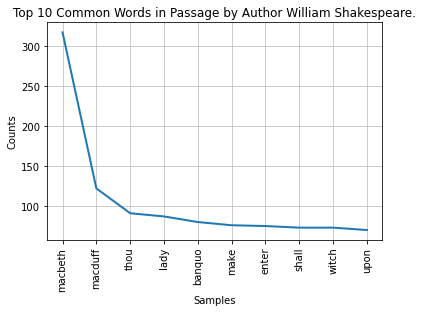

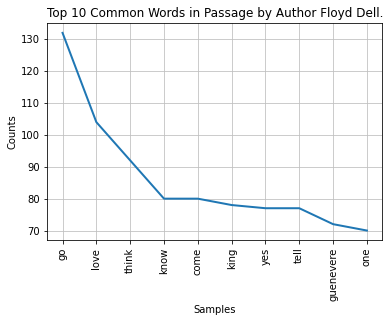

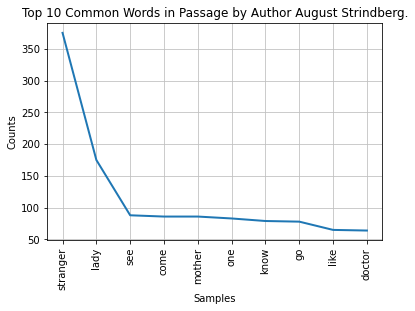

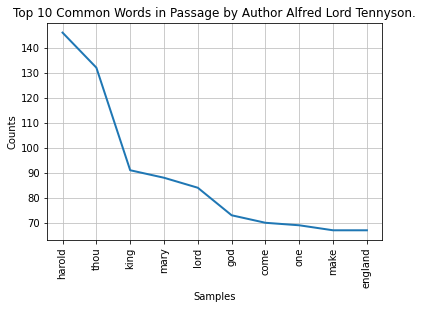

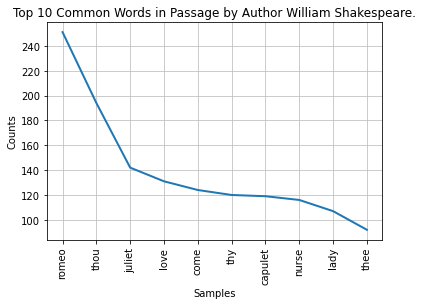

In [5]:
Dictionary_Keys=final_author_list
values=""
sentences=[]
for i in range(0, len(df.index)):
    values=values+' '+ df['cleaned'][i]
    if i%200==0 and i!=0:
      sentences.append(values)
      values=""
sentences.append(values)

for i,value in enumerate(sentences):
  tokenized_word=nltk.word_tokenize(value)
  fdist = FreqDist(tokenized_word)
  fdist.plot(10,cumulative=False,title='Top 10 Common Words in Passage by Author {0}.'.format(Dictionary_Keys[i]))
  plt.show()

# **Word Cloud Visualization**

well lennox voice macbeth man king purpose go trust far chestnuts banquo shall yet ireland begin say strong yield man toy lady ross ay drugg captain something slay masterpiece image leg ay look enter love poor quickly apace see macbeth seek court till command bed hast second saint upon accent poor macbeth beside
William Shakespeare


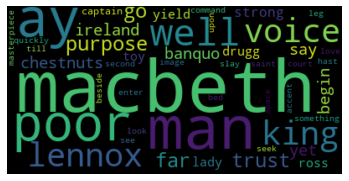

ye leave another caithness might sleep drench aleppo go sleep dog eye mark go beard jutty come master alas win fleance lennox like love duncan feel thither till macbeth men shall dead macduff receive lady macbeth stab knock hair upon th fire gain banquo cream stopp palter sir
Floyd Dell


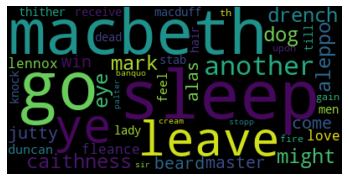

room er ross move grieve away work stand gap macbeth fool remove must day lightning go exeunt fight first shall even wife blood swear england love things macbeth unseam vice fortune ross ways duncan state die cauldron thy yet ask another celebrate pernicious pray toward thou inverness parley art mile health thereby move grapple caithness tell malcolm say let lennox might
August Strindberg


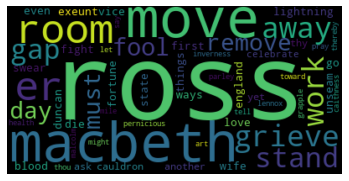

macbeth tree doubt mirth leave sleep daughters tongue night star thy beside sleep macbeth countenance plain christendom banquo destruction dst lose music wasteful despair sir castle hose become school know one shall soldier unlock knell feel valour start hither shall file effect multiply devilish ning cause macduff oppress think malcolm number hecate neither mar fit thou take prowess office
Alfred Lord Tennyson


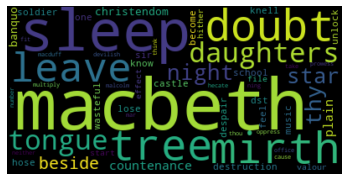

must st hangman carry lady upon young return blood precious hang therefore lennox thrust fleance thing fear unlock lie sometime macbeth earth report parricide deserve shall young us slave king bear love macbeth host ii palter first death design largess thou hags yield must colour one former saw none banquo perchance get imperial worthy know
William Shakespeare


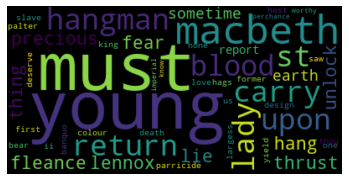

In [6]:
# Importing necessary libraries
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

X = df['cleaned']

wordcloud1 = WordCloud().generate(str(X[0]))  
wordcloud2 = WordCloud().generate(str(X[1])) 
wordcloud3 = WordCloud().generate(str(X[2])) 
wordcloud4 = WordCloud().generate(str(X[3])) 
wordcloud5 = WordCloud().generate(str(X[4])) 

print(X[0])
print(df['author'][0])
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

print(X[1])
print(df['author'][200])
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

print(X[2])
print(df['author'][400])
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

print(X[3])
print(df['author'][600])
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.show()

print(X[4])
print(df['author'][800])
plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Data Transformation Using Bag of Words**

In [7]:
fit_model = CountVectorizer(analyzer=text_process).fit(df['Data'])
transform_model = fit_model.transform(df['Data'])
print('Vocabulary Length: ', len(fit_model.vocabulary_))
print(transform_model)
print('Shape of Sparse Matrix: ', transform_model.shape)
print('Amount of Non-Zero occurences: ', transform_model.nnz)

Vocabulary Length:  27
  (0, 0)	52
  (0, 1)	24
  (0, 2)	7
  (0, 3)	14
  (0, 4)	8
  (0, 5)	31
  (0, 6)	1
  (0, 7)	9
  (0, 8)	7
  (0, 9)	13
  (0, 11)	4
  (0, 12)	15
  (0, 13)	10
  (0, 14)	18
  (0, 15)	20
  (0, 16)	8
  (0, 17)	2
  (0, 18)	12
  (0, 19)	18
  (0, 20)	19
  (0, 21)	8
  (0, 22)	2
  (0, 23)	1
  (0, 24)	1
  (0, 25)	9
  :	:
  (999, 0)	60
  (999, 1)	21
  (999, 2)	5
  (999, 3)	8
  (999, 4)	14
  (999, 5)	45
  (999, 6)	1
  (999, 7)	9
  (999, 8)	11
  (999, 9)	14
  (999, 10)	1
  (999, 11)	1
  (999, 12)	17
  (999, 13)	13
  (999, 14)	20
  (999, 15)	27
  (999, 16)	2
  (999, 17)	1
  (999, 18)	23
  (999, 19)	14
  (999, 20)	26
  (999, 21)	17
  (999, 22)	3
  (999, 23)	6
  (999, 25)	5
Shape of Sparse Matrix:  (1000, 27)
Amount of Non-Zero occurences:  24067


# **Fitting RandomForest,SVM and KNN classification models with BOW**

In [8]:
models = {"RFC" :  RandomForestClassifier(random_state=42),
          "SVM" : SVC(random_state=42),
          "KNN" : KNeighborsClassifier()
          } 

In [9]:

# 90-10 splitting the dataset (90%->Training and 10%->Testing)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned'], df['author']
                                  ,test_size=0.1, random_state=1234)  

# defining the bag-of-words transformer on the text-processed corpus 
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_train)

# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_train=bow_transformer.transform(X_train)#ONLY TRAINING DATA

# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_test=bow_transformer.transform(X_test)#TEST DATA

[[13  2  2  6]
 [ 0 12  4  6]
 [ 1  1 14  0]
 [ 3  1  3 32]]


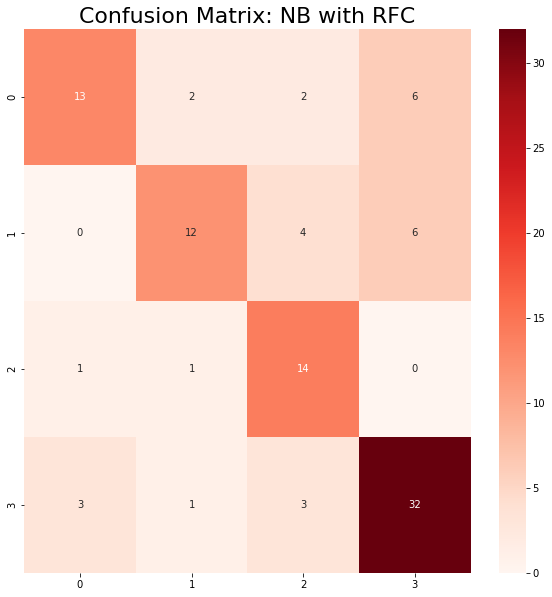

                      precision    recall  f1-score   support

Alfred Lord Tennyson       0.76      0.57      0.65        23
   August Strindberg       0.75      0.55      0.63        22
          Floyd Dell       0.61      0.88      0.72        16
 William Shakespeare       0.73      0.82      0.77        39

            accuracy                           0.71       100
           macro avg       0.71      0.70      0.69       100
        weighted avg       0.72      0.71      0.70       100

0.71
[[17  1  1  4]
 [ 1 12  5  4]
 [ 0  1 15  0]
 [ 3  1  3 32]]


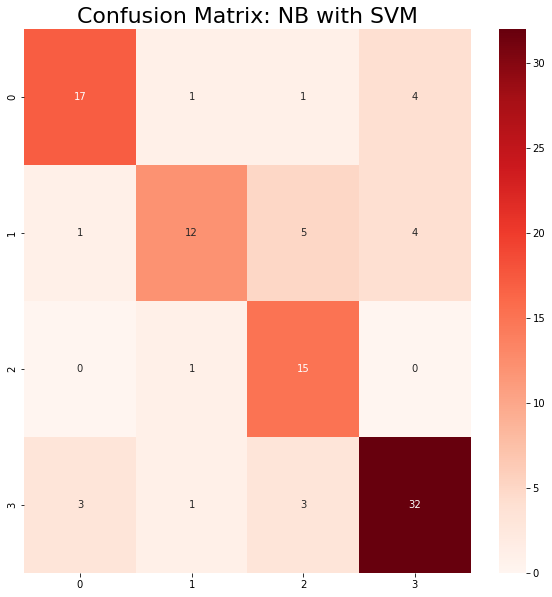

                      precision    recall  f1-score   support

Alfred Lord Tennyson       0.81      0.74      0.77        23
   August Strindberg       0.80      0.55      0.65        22
          Floyd Dell       0.62      0.94      0.75        16
 William Shakespeare       0.80      0.82      0.81        39

            accuracy                           0.76       100
           macro avg       0.76      0.76      0.75       100
        weighted avg       0.77      0.76      0.76       100

0.76
[[15  2  0  6]
 [ 2 11  5  4]
 [ 2  3 11  0]
 [ 3  2  3 31]]


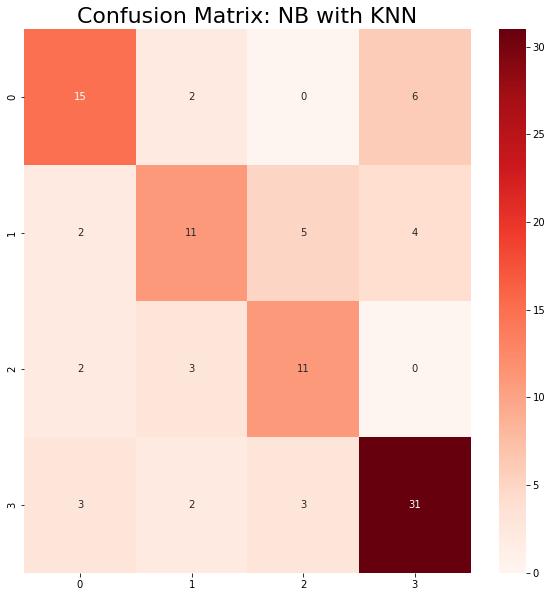

                      precision    recall  f1-score   support

Alfred Lord Tennyson       0.68      0.65      0.67        23
   August Strindberg       0.61      0.50      0.55        22
          Floyd Dell       0.58      0.69      0.63        16
 William Shakespeare       0.76      0.79      0.77        39

            accuracy                           0.68       100
           macro avg       0.66      0.66      0.66       100
        weighted avg       0.68      0.68      0.68       100

0.68
  Model  Precision    Recall        f1  Accuracy
0   RFC   0.712669  0.701546  0.704042      0.71
1   SVM   0.758631  0.760649  0.756379      0.76
2   KNN   0.656994  0.658636  0.677155      0.68


In [10]:
from sklearn import metrics
#fit and transform, and train the classifiers
precision_array = []
recall_array = []
f1_array = []
model_array = []
accuracy_array = [] 
model_scores = {}
predictions = {}

for name, model in models.items():    
      model_name=name
      model.fit(text_bow_train, y_train)
      predictions[name] = model.predict(text_bow_test) 
      
      
      # confusion matrix
      conf_mat = metrics.confusion_matrix(y_test,predictions[name])
      print(conf_mat)

      # plot confusion matrix
      title = "Confusion Matrix: NB with {}".format(model_name)
      fig, ax = plt.subplots(sharey=True,figsize=(10,10))
      sns.heatmap(conf_mat, cmap="Reds",annot=True, fmt='')
      plt.title(title, fontsize=22)
      plt.show()
      
      # Print a classification report
      print(metrics.classification_report(y_test,predictions[name]))

      # Print the overall accuracy
      print(metrics.accuracy_score(y_test,predictions[name]))
    

      # Get performance data of the model
      model_array.append(format(model_name))
      f1_array.append(metrics.f1_score(y_test, predictions[name], average='weighted'))
      precision_array.append(metrics.precision_score(y_test, predictions[name], average='macro'))
      recall_array.append(metrics.recall_score(y_test, predictions[name], average='macro'))
      accuracy_array.append(metrics.accuracy_score(y_test, predictions[name]))
    

performance_data = pd.DataFrame({"Model": model_array, "Precision": precision_array, "Recall": recall_array, "f1": f1_array, "Accuracy": accuracy_array})
print(performance_data)

# Initialize tf-idf accuracy for plotting graph
bow_accuracy = pd.Series({
    'RFC': accuracy_array[0],
    'SVM': accuracy_array[1],
    'KNN': accuracy_array[2]
})

# **Ten Fold cross validation with NB**

In [11]:
cv = CountVectorizer(sublinear=True, min_df=5, ngram_range=(1, 2), stop_words='english')
features = cv.fit_transform(df.Data).toarray()
labels = df.author
accuracies_array_tfidf = []
entries=[]


for name,model in models.items():
  model_name = name
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=10)
  accuracies_array_tfidf.append(accuracies)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

print(cv_df.groupby('model_name').accuracy.mean())

TypeError: __init__() got an unexpected keyword argument 'sublinear'

# **Data Transformation Using TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['Data'])


tfidf_transform = TfidfTransformer().fit(transform_model)
tfidf = tfidf_transform.transform(transform_model)


#instantiate CountVectorizer() 
cv=CountVectorizer() 
# this steps generates word counts for the words 
word_count_vector=cv.fit_transform(df['Data'])
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
# sort ascending 
df_idf.sort_values(by=['idf_weights'])

print(Tfidf_vect.vocabulary_)

print(df_idf)

print(tfidf)

# **Fitting RandomForest,SVM and KNN classification models with TF-IDF**

In [ ]:
models = {"RFC" :  RandomForestClassifier(random_state=42),
          "SVM" : SVC(random_state=42),
          "KNN" : KNeighborsClassifier()
          } 

In [ ]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Data'], df['author'], test_size=0.2, random_state=1234)

# defining the TF-IDF transformer on the text-processed corpus 
tfidf_transformer=CountVectorizer(analyzer=text_process).fit(X_train)

# transforming into TF-IDF and hence textual data to numeric..
text_tfidf_train=tfidf_transformer.transform(X_train)#ONLY TRAINING DATA

# transforming into TF-IDF and hence textual data to numeric..
text_tfidf_test=tfidf_transformer.transform(X_test)#TEST DATA

In [ ]:
from sklearn import metrics
#fit and transform, and train the classifiers
precision_array = []
recall_array = []
f1_array = []
model_array = []
accuracy_array = [] 
model_scores = {}
predictions = {}

for name, model in models.items():    
      model_name=name
      model.fit(text_tfidf_train, y_train)
      predictions[name] = model.predict(text_tfidf_test) 
      model_scores[name] = cross_val_score(model, text_tfidf_test, y_test, cv=10, scoring="accuracy") # ten-fold cross validation
      
      # confusion matrix
      conf_mat = metrics.confusion_matrix(y_test,predictions[name])
      print(conf_mat)

      # plot confusion matrix
      title = "Confusion Matrix: TF-IDF with {}".format(model_name)
      fig, ax = plt.subplots(sharey=True,figsize=(10,10))
      sns.heatmap(conf_mat, cmap="Reds",annot=True, fmt='')
      plt.title(title, fontsize=22)
      plt.show()
      
      # Print a classification report
      print(metrics.classification_report(y_test,predictions[name]))

      # Print the overall accuracy
      print(metrics.accuracy_score(y_test,predictions[name]))
    

      # Get performance data of the model
      model_array.append(format(model_name))
      f1_array.append(metrics.f1_score(y_test, predictions[name], average='weighted'))
      precision_array.append(metrics.precision_score(y_test, predictions[name], average='macro'))
      recall_array.append(metrics.recall_score(y_test, predictions[name], average='macro'))
      accuracy_array.append(metrics.accuracy_score(y_test, predictions[name]))
    

performance_data = pd.DataFrame({"Model": model_array, "Precision": precision_array, "Recall": recall_array, "f1": f1_array, "Accuracy": accuracy_array})
print(performance_data)

# Initialize tf-idf accuracy for plotting graph
tfidf_accuracy = pd.Series({
    'RFC': accuracy_array[0],
    'SVM': accuracy_array[1],
    'KNN': accuracy_array[2]
})

In [ ]:
c

# **Ten Fold cross validation with TF-IDF**



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Data).toarray()
labels = df.author
accuracies_array_tfidf = []
entries=[]


for name,model in models.items():
  model_name = name
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=10)
  accuracies_array_tfidf.append(accuracies)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

print(cv_df.groupby('model_name').accuracy.mean())


# **Fitting models with a dataset without cleaning  stopwords and Punctuation**

In [ ]:
def fit_and_score_no(models, X_train, y_train, X_test, y_test):
  
    model_scores = {}
    predictions = {}
    for name, model in models.items():
      pipeline_bow_no = Pipeline([('bow', CountVectorizer()), # Bag of Words
                                    ('model', model)]) # Fit the model
      pipeline_bow_no.fit(X_train, y_train)
      predictions[name] = pipeline_bow_no.predict(X_test) 
      model_scores[name] = cross_val_score(pipeline_bow_no, X_test, y_test, cv=10, scoring="accuracy") # 10-Fold Cross-Validation
    return model_scores, predictions

# Storing the scores and predictions
model_scores_no, predictions_no = fit_and_score_no(models=models,
                             X_train=X_train,
                             y_train=y_train,
                             X_test=X_test,
                             y_test=y_test)

# Taking the average of the K-Fold Cross-Validated Scores
model_scores_no_avg = {}
for name, model in model_scores_no.items():
  model_scores_no_avg[name] = np.mean(model)

# Converting it into a dataframe
model_scores_no_avg_df = pd.DataFrame(model_scores_no_avg, index=["Accuracy"]).T
model_scores_no_avg_df

In [ ]:
model_scores_no_avg_df.plot(kind='bar', figsize=(8,8), title="Accuracy of models without cleaning stopwords and Punctuation", legend=False, alpha=0.75, rot=0)

In [ ]:
print(classification_report(y_test, predictions_no["RFC"]))

In [ ]:
print(classification_report(y_test, predictions_no["SVM"]))

In [ ]:
print(classification_report(y_test, predictions_no["KNN"]))

In [ ]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(25,8))
sns.heatmap(confusion_matrix(y_test, predictions_no["RFC"]), cmap= "Reds", annot=True, fmt='', ax=ax1)
sns.heatmap(confusion_matrix(y_test, predictions_no["SVM"]), cmap= "Reds", annot=True, fmt='', ax=ax2)
sns.heatmap(confusion_matrix(y_test, predictions_no["KNN"]), cmap= "Reds", annot=True, fmt='', ax=ax3)

ax1.set_title('RFC')
ax2.set_title('SVM')
ax3.set_title('KNN')

# **Fitting models with a dataset with less number of words**

In [ ]:

# Splitting the data into train and test
X_train_, X_test_, y_train_, y_test_ = train_test_split(dfnew["Data"], dfnew["author"], test_size=0.2, random_state=42)

def fit_and_score_less(models, X_train, y_train, X_test, y_test):
  
    model_scores = {}
    predictions = {}
    for name, model in models.items():
      pipeline_bow_less = Pipeline([('bow', CountVectorizer(analyzer=text_process)), # Bag of Words
                                    ('model', model)]) # Fit the model
      pipeline_bow_less.fit(X_train, y_train)
      predictions[name] = pipeline_bow_less.predict(X_test) 
      model_scores[name] = cross_val_score(pipeline_bow_less, X_test, y_test, cv=10, scoring="accuracy") # 10-Fold Cross-Validation
    return model_scores, predictions

# Storing the scores and predictions
model_scores_less, predictions_less = fit_and_score_less(models=models,
                             X_train=X_train_,
                             y_train=y_train_,
                             X_test=X_test_,
                             y_test=y_test_)

# Taking the average of the K-Fold Cross-Validated Scores
model_scores_less_avg = {}
for name, model in model_scores_less.items():
  model_scores_less_avg[name] = np.mean(model)

# Converting it into a dataframe
model_scores_less_avg_df = pd.DataFrame(model_scores_less_avg, index=["Accuracy"]).T
model_scores_less_avg_df

In [ ]:
model_scores_less_avg_df.plot(kind='bar', figsize=(8,8), title="Accuracy of models with less number of words", legend=False, alpha=0.75, rot=0)

In [ ]:
print(classification_report(y_test, predictions["RFC"]))
print(classification_report(y_test, predictions["SVM"]))
print(classification_report(y_test, predictions["KNN"]))

In [ ]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(25,8))
sns.heatmap(confusion_matrix(y_test, predictions["RFC"]), cmap= "Reds", annot=True, fmt='', ax=ax1)
sns.heatmap(confusion_matrix(y_test, predictions["SVM"]), cmap= "Reds", annot=True, fmt='', ax=ax2)
sns.heatmap(confusion_matrix(y_test, predictions["KNN"]), cmap= "Reds", annot=True, fmt='', ax=ax3)

ax1.set_title('RFC')
ax2.set_title('SVM')
ax3.set_title('KNN')

# **Data Transformation Using Doc2Vec**

In [ ]:
#Import packages
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize


#Dictionary that holds the author as the value and their label as the key
Book_dict={"A":"Shakespeare", "B":"Floyd Dell", "C":"August Strindberg",
           "D":"Alfred Lord Tennyson", "E":"Shakespeare"}




book_corpus=[]
Dict_Keys=list(Book_dict.keys())
values=""
sentences=[]

#appends all the words from each book to a list of lists
for i in range(0, len(df.index)):
    values=values+' '+ df['cleaned'][i]
    if i%200==0 and i!=0:
      sentences.append(values)
      values=""
sentences.append(values)

#creates a tagged document list which has the form {[words], author }
tagged_data = []
for i,value in enumerate(sentences):
     tagged_data.append(gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(value),["{}".format(Dict_Keys[i])]))
 

In [ ]:
#Builds the model by randomly selecting possible words and document tags. Tags being like "labels" in this case
doc2vecModel = gensim.models.doc2vec.Doc2Vec(vector_size=300, min_count=3, epochs=50)
doc2vecModel.build_vocab(tagged_data)
print("Model's vocab length", len(doc2vecModel.wv.vocab))


In [ ]:
# Train the model on the words chosen from the models vocab
doc2vecModel.train(tagged_data, total_examples=doc2vecModel.corpus_count, epochs=doc2vecModel.epochs)

In [ ]:
## randomly selected paragraphs from the df
## df from [0:200]  is for Author  A (Shakespeare)
## df from [201:400] is for Author B (Floyd Dell)
## df from [401:600] is for Author C (August Strindberg)
## df from [601:800] is for Author D (Alfred Lord Tennyson)
## df from [801:999] is for Author E (Shakespeare)


# df a vector(tuple with the author's label and the accuracy of the model prediction)
inferred_vector = doc2vecModel.infer_vector(df["words"][999])  # changing the sample size will change the accuracy
sims = doc2vecModel.docvecs.most_similar([inferred_vector], topn=len(doc2vecModel.docvecs))


#Most accurate and least accurate predictions
print("The paragraph resonates with the following authors..")
for label, index in [('MOST', 0),  ('LEAST', len(sims) - 1)]:
  print(label,sims[index])

# **Fitting Linear Regression, Random Forest Regression, KNN and SVM classifier on doc2vec vectors**

In [ ]:
import pandas as pd
import numpy as np
import multiprocessing

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt



train_data= []
test_data = []

cores = multiprocessing.cpu_count()

#### SETTING TRAIN AND TEST with 
train, test = train_test_split(df,test_size=0.1, random_state=42)  #testing with 10% of the data gives best accuracy while testing with 90% gives the worst accuracy


def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens   

#creates a tagged document of the trained and test data split

train_tagged = train.apply(
      lambda r: TaggedDocument(words=tokenize_text(r['cleaned']), tags=[r.author]), axis=1)
test_tagged = test.apply(
      lambda r: TaggedDocument(words=tokenize_text(r['cleaned']), tags=[r.author]), axis=1)



print(train_tagged.values[0])

# Creates the model and builds the vocab just like before
d2vModel = gensim.models.doc2vec.Doc2Vec(vector_size=300, min_count=3, epochs=50)
d2vModel.build_vocab(train_tagged)


In [ ]:
# trains the model for 30 epochs 
%%time
for epoch in range(30):
    d2vModel.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    d2vModel.alpha -= 0.002
    d2vModel.min_alpha = d2vModel.alpha

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Function that gets the inferred vector like before and splits the tuple to target and words
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, words = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, words

# Splits the word and target to test and train 
y_train, X_train = vec_for_learning(d2vModel, train_tagged)
y_test, X_test = vec_for_learning(d2vModel, test_tagged)


In [ ]:
 #Testing the doc2vec model on Random Forest, linear regression, SVM and KNN
from sklearn.naive_bayes import MultinomialNB
 models = {"RF": RandomForestClassifier(random_state=42),
           "LR": LogisticRegression(n_jobs=1,C=1e5, random_state =42),
           "SVM" : SVC(random_state=42),
           "KNN":  KNeighborsClassifier()}


#fit and transform, and train the classifiers
def transformModel(models, y_train, X_train, y_test, X_test):
    model_scores = {}
    predictions = {}

    for name, model in models.items():                               
      model.fit(X_train, y_train)
      predictions[name] = model.predict(X_test) 
      model_scores[name] = cross_val_score(model, X_test, y_test, cv=10, scoring="accuracy") # ten-fold cross validation

    return model_scores, predictions

model_scores_no, predictions = transformModel(models=models,
                             y_train=y_train,
                             X_train=X_train,
                             y_test=y_test,
                             X_test=X_test)

model_scores_no_avg = {}
for name, model in model_scores_no.items():
  model_scores_no_avg[name] = np.mean(model)

# Converting it into a dataframe
doc2vec_df = pd.DataFrame(model_scores_no_avg, index=["Accuracy"]).T
doc2vec_df



In [ ]:
doc2vec_df.plot(kind='bar', figsize=(8,8), title="Accuracy of models with Doc2Vec", legend=False, alpha=0.75, rot=0)

In [ ]:
print(classification_report(y_test, predictions["RF"]))


In [ ]:
print(classification_report(y_test, predictions["LR"]))

In [ ]:
print(classification_report(y_test, predictions["SVM"]))

In [ ]:
print(classification_report(y_test, predictions["KNN"]))

In [ ]:
fig,(ax1,ax2,ax3, ax4) = plt.subplots(1,4,sharey=True, figsize=(25,8))
sns.heatmap(confusion_matrix(y_test, predictions["RF"]), cmap= "Reds", annot=True, fmt='', ax=ax1)
ax1.set_title('RF')
sns.heatmap(confusion_matrix(y_test, predictions["SVM"]), cmap= "Reds", annot=True, fmt='', ax=ax2)
ax2.set_title('SVM')
sns.heatmap(confusion_matrix(y_test, predictions["KNN"]), cmap= "Reds", annot=True, fmt='', ax=ax3)
ax3.set_title('KNN')
sns.heatmap(confusion_matrix(y_test, predictions["LR"]), cmap= "Reds", annot=True, fmt='', ax=ax4)
ax4.set_title('LR')

# **Data Transformation using LDA**

In [ ]:
from nltk import corpus
from traitlets.traitlets import Dict
from gensim.utils import lemmatize
#Transpose of the DataFrame to better transfor the data
###df_transpose = pd.melt(df, id_vars=None, value_vars=['Book1', 'Book2', 'Book3', 'Book4', 'Book5'])
###df_transpose.rename({"variable":"Book", "value":"Text Samples"}, axis=1, inplace=True)

#Tokenising Text Samples for LDA Transformation
df_tok = df["cleaned"]

tokenizing = RegexpTokenizer(r'\w+')
for tdx in range(len(df_tok)): 
  df_tok[tdx] = tokenizing.tokenize(df_tok[tdx])

#Filtering more words from the Text Samples through the tokenization
df_tok = [[tokens for tokens in BookWords if len(tokens) > 1] for BookWords in df_tok]

#Lemmatization 
lemmatizer = WordNetLemmatizer()
df_tok = [[lemmatizer.lemmatize(tokens) for tokens in BookWords] for BookWords in df_tok]

#Bigram of words
bigram = Phrases(df_tok, min_count=20)
for tdx in range(len(df_tok)): 
  for tokens in bigram[df_tok[tdx]]:
    if '_' in tokens: 
      df_tok[tdx].append(tokens)

#Dictionary 
dictionary = Dictionary(df_tok)
dictionary.filter_extremes(no_below=20, no_above=0.5)

#Corpus 
corpus_matrix = [dictionary.doc2bow(BookWords) for BookWords in df_tok]

#Building the model 
num_topics = 20
chunksize = 2000
passes = 50 
iterations = 400
eval_every = None 

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus = corpus_matrix,
    num_topics = num_topics,
    id2word = id2word,
    passes = passes, 
    chunksize = chunksize, 
    alpha = 'auto',
    eta = 'auto',
    iterations = iterations,
    eval_every = eval_every)

top_topics = model.top_topics(corpus_matrix)

model.print_topics()

In [ ]:
print(top_topics)

# **LDA Vectorization**

In [ ]:

df_lda = df.copy()
##df_lda['cleaned'] = df_lda['Text Samples'].apply(lambda x:' '.join(x))

#Finding the number of topics in data
min_df = 5 #minimum number for document frequency in the corpus
rm_top = 5 #remove top n frequent words 
workers = 4 #numbers of workers throughout the project 

hdp_model = HDPModel(min_df = min_df, rm_top = rm_top)
hdp_model.optim_interval = 5
for d in df_lda['cleaned']:
  hdp_model.add_doc(d)
hdp_model.burn_in = 100
hdp_model.train(0, workers = workers)
for i in range(0,1000,10):
  hdp_model.train(10, workers = workers)
  print('Iterations: {}\tLog-likelyhood: {}\tNum. of topics: {}'.format(i, hdp_model.ll_per_word, hdp_model.live_k))

num_of_topics = hdp_model.live_k

# **Fitting KNN model on LDA Vectorization**

In [ ]:
from numpy.lib.function_base import vectorize
#Creation of vector 
vectorizer = TomotopyLDAVectorizer(num_of_topics=5,
                                   workers = workers,
                                   min_df = min_df, 
                                   rm_top = rm_top)

x_transformed = vectorizer.fit_transform(df_lda['cleaned'])

#Labels (y)
y = df_lda['author']

#Splitting the data into train and test set 
train_X, test_X, train_y, test_y = train_test_split(x_transformed, y, test_size=0.1, random_state=42)

#Machine Learning 
knn = KNeighborsClassifier()

#Train the model 
knn.fit(train_X, train_y)

#Model evaluation 
knn.score(test_X, test_y)

In [ ]:
#max_df_lda = 1.9
#in_df_lda = 10

#cv = CountVectorizer(max_df = max_df_lda, min_df = min_df_lda, max_features = None, lowercase = True)

#Fitting count vectorizer
#td = cv.fit_transform(np.array(df_lda['words'].values.astype('U')))

#Getting the terms (features) generated by count vectorizer
#terms = cv.get_feature_names()

# **Fitting the Best Model- Champion Model**

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

rf = RandomForestClassifier(random_state = 42)

r_grid = {     'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf_random = RandomizedSearchCV(estimator = rf, param_distributions = r_grid, n_iter = 10, cv = 2, verbose=True, random_state=42, n_jobs = -1)  
rf_random.fit(X_train, y_train)        

In [ ]:
rf_random.best_params_

In [ ]:
rf_random.score(X_test, y_test)